## 1. Setup & Imports

In [ ]:
# === 0. HEALTH CHECK ===
import sys, pandas as pd, numpy as np, matplotlib

print("Python:", sys.version.split()[0],
      "| pandas:", pd.__version__,
      "| numpy:", np.__version__,
      "| matplotlib:", matplotlib.__version__)

# Dataset verification function (run AFTER downloading df)
def check_df(df):
    required = ["type","title","release_year","date_added","duration","listed_in","rating","country"]
    missing = [c for c in required if c not in df.columns]
    if missing:
        raise ValueError(f"❌ The dataset is missing columns: {missing}")
    
    soft = ["added_year","added_month","duration_min","seasons_count"]
    warn = [c for c in soft if c not in df.columns]
    if warn:
        print("⚠️:", warn)
    else:
        print("✅ All calculated columns are in place:", soft)

print("✅ The environment check is completed.")


import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Display options
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

print("Python:", sys.version)
print("Pandas:", pd.__version__)
print("Numpy :", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)

Python: 3.13.7 | pandas: 2.3.2 | numpy: 2.3.3 | matplotlib: 3.10.6
✅ The environment check is completed.
Python: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
Pandas: 2.3.2
Numpy : 2.3.3
Matplotlib: 3.10.6


## 2. Load Data

In [ ]:
CSV_PATH = "data/netflix_titles.csv"

df = pd.read_csv(CSV_PATH)
print("Rows:", len(df))
df.head(10)

Rows: 8807


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
check_df(df)

⚠️: ['added_year', 'added_month', 'duration_min', 'seasons_count']


## 3. Quick Overview

In [4]:
# Schema & types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Descriptive stats (categorical-friendly)
df.describe(include="all").T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Missing values
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts / len(df) * 100).round(1).astype(str) + "%"
missing = pd.DataFrame({"missing": na_counts, "share": na_pct})
missing.head(15)

,missing,share
director,2634,29.9%
country,831,9.4%
cast,825,9.4%
date_added,10,0.1%
rating,4,0.0%
duration,3,0.0%
show_id,0,0.0%
type,0,0.0%
title,0,0.0%
release_year,0,0.0%


## 4. Duplicates & Basic Cleaning

In [ ]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


## 5. Parse Dates & Key Columns

In [ ]:
# Convert 'date_added' to datetime; coerce invalid to NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year/month from date_added
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')

# Normalize 'duration' to numeric minutes for Movies and seasons for TV Shows
def parse_duration(val):
    if pd.isna(val):
        return np.nan, np.nan
    s = str(val).lower().strip()
    if "min" in s:
        # movie minutes
        try:
            return int(s.split(" ")[0]), np.nan
        except:
            return np.nan, np.nan
    if "season" in s:
        # number of seasons
        try:
            return np.nan, int(s.split(" ")[0])
        except:
            return np.nan, np.nan
    return np.nan, np.nan

durations = df['duration'].apply(parse_duration)
df['duration_min']   = durations.apply(lambda x: x[0])
df['seasons_count']  = durations.apply(lambda x: x[1])

df[['type','title','release_year','date_added','added_year','duration','duration_min','seasons_count']].head(10)

,type,title,release_year,date_added,added_year,duration,duration_min,seasons_count
0,Movie,Dick Johnson Is Dead,2020,2021-09-25,2021.0,90 min,90.0,NaN
1,TV Show,Blood & Water,2021,2021-09-24,2021.0,2 Seasons,NaN,2.0
2,TV Show,Ganglands,2021,2021-09-24,2021.0,1 Season,NaN,1.0
3,TV Show,Jailbirds New Orleans,2021,2021-09-24,2021.0,1 Season,NaN,1.0
4,TV Show,Kota Factory,2021,2021-09-24,2021.0,2 Seasons,NaN,2.0
5,TV Show,Midnight Mass,2021,2021-09-24,2021.0,1 Season,NaN,1.0
6,Movie,My Little Pony: A New Generation,2021,2021-09-24,2021.0,91 min,91.0,NaN
7,Movie,Sankofa,1993,2021-09-24,2021.0,125 min,125.0,NaN
8,TV Show,The Great British Baking Show,2021,2021-09-24,2021.0,9 Seasons,NaN,9.0
9,Movie,The Starling,2021,2021-09-24,2021.0,104 min,104.0,NaN


## 6. Distributions & Trends

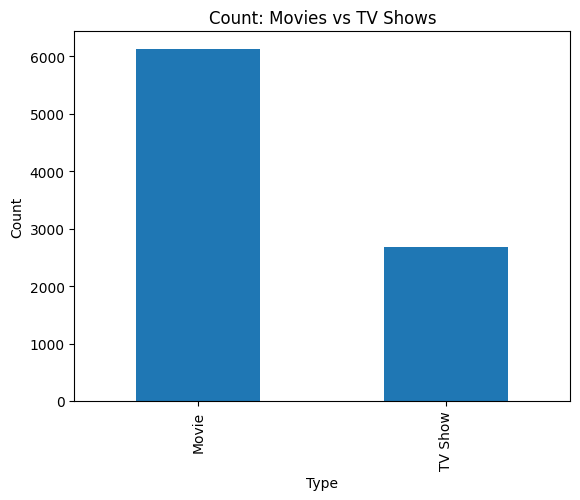

In [9]:
# 6.1 Content type distribution
counts = df['type'].value_counts().sort_values(ascending=False)
ax = counts.plot(kind='bar')
ax.set_title("Count: Movies vs TV Shows")
ax.set_xlabel("Type")
ax.set_ylabel("Count")
plt.show()

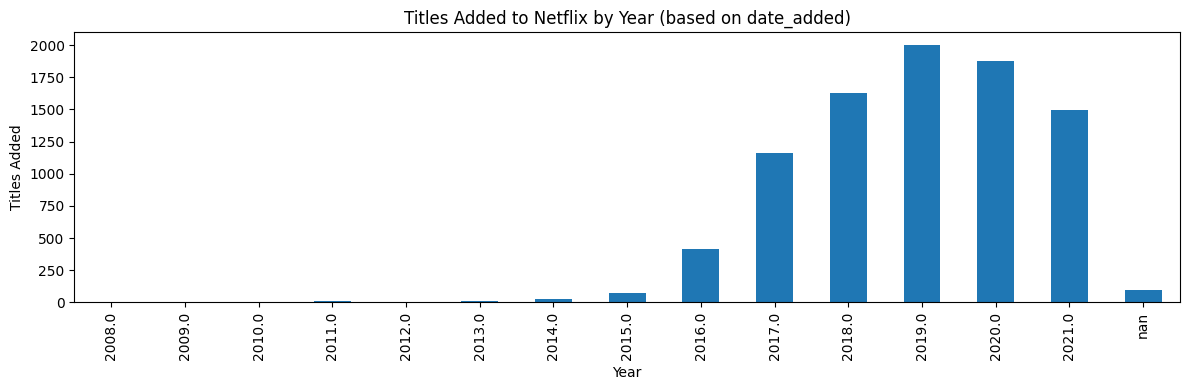

In [10]:
# 6.2 Titles added by year (platform growth)
added_by_year = df.groupby('added_year', dropna=False)['show_id'].count().sort_index()
ax = added_by_year.plot(kind='bar', figsize=(12,4))
ax.set_title("Titles Added to Netflix by Year (based on date_added)")
ax.set_xlabel("Year")
ax.set_ylabel("Titles Added")
plt.tight_layout()
plt.show()

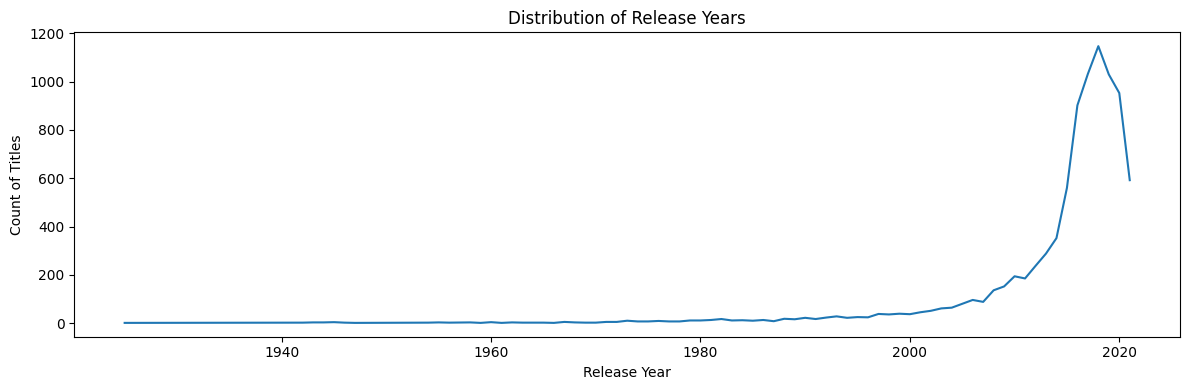

In [11]:
# 6.3 Release year distribution (production trend)
release_counts = df['release_year'].value_counts(dropna=True).sort_index()
ax = release_counts.plot(kind='line', figsize=(12,4))
ax.set_title("Distribution of Release Years")
ax.set_xlabel("Release Year")
ax.set_ylabel("Count of Titles")
plt.tight_layout()
plt.show()

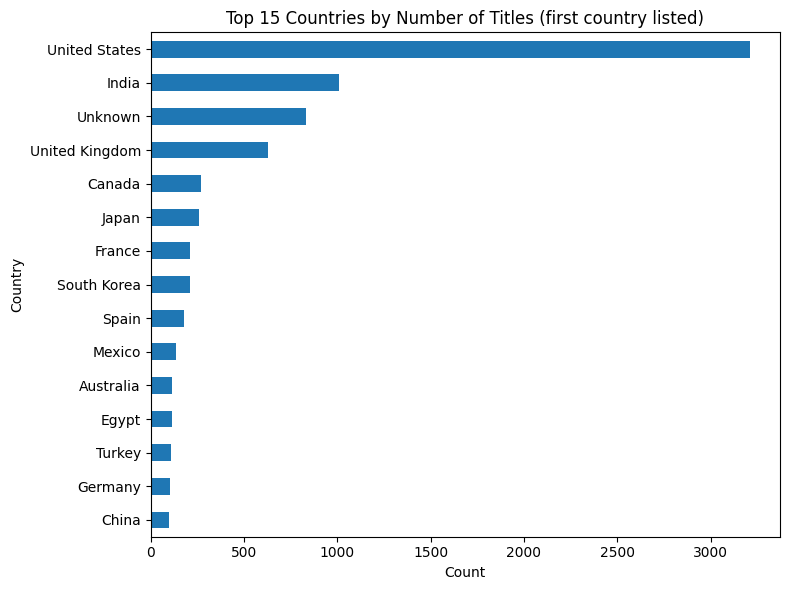

In [ ]:
# 6.4 Top countries by content count
first_country = df['country'].fillna('Unknown').apply(lambda s: s.split(',')[0].strip())
top_countries = first_country.value_counts().head(15).sort_values()
ax = top_countries.plot(kind='barh', figsize=(8,6))
ax.set_title("Top 15 Countries by Number of Titles (first country listed)")
ax.set_xlabel("Count")
ax.set_ylabel("Country")
plt.tight_layout()
plt.show()

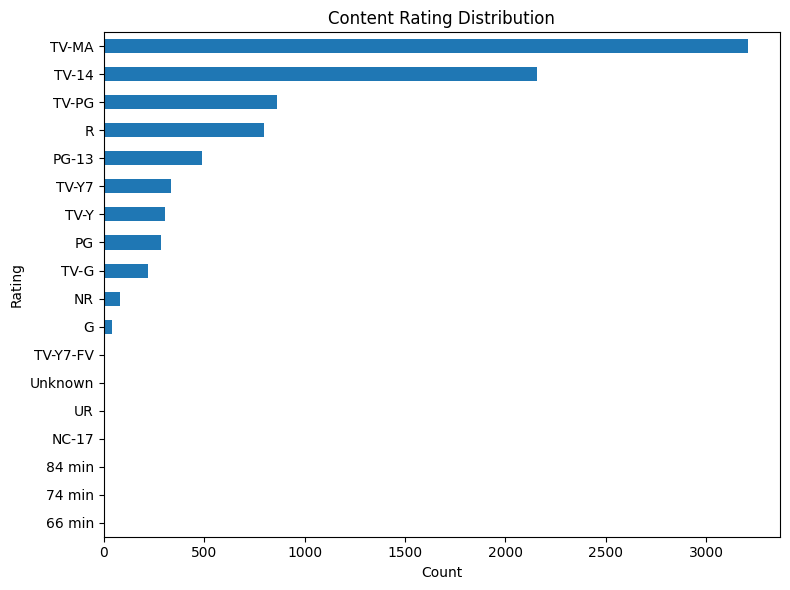

In [13]:
# 6.5 Rating distribution
ax = df['rating'].fillna('Unknown').value_counts().sort_values().plot(kind='barh', figsize=(8,6))
ax.set_title("Content Rating Distribution")
ax.set_xlabel("Count")
ax.set_ylabel("Rating")
plt.tight_layout()
plt.show()

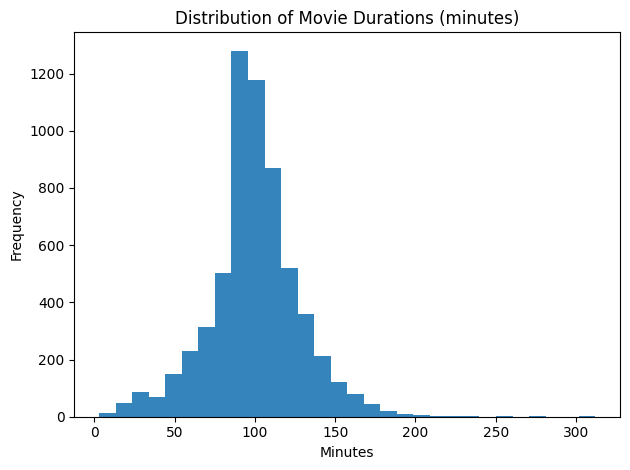

In [14]:
# 6.6 Duration analysis for Movies
movies = df[df['type']=='Movie']
ax = movies['duration_min'].dropna().plot(kind='hist', bins=30, alpha=0.9)
ax.set_title("Distribution of Movie Durations (minutes)")
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

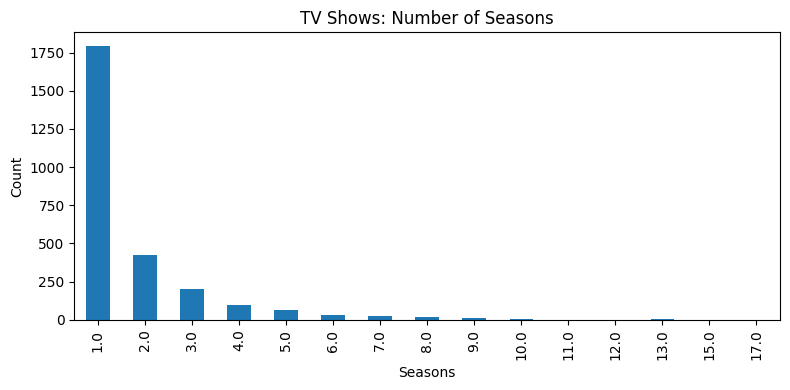

In [15]:
# 6.7 Seasons analysis for TV Shows
shows = df[df['type']=='TV Show']
ax = shows['seasons_count'].dropna().value_counts().sort_index().plot(kind='bar', figsize=(8,4))
ax.set_title("TV Shows: Number of Seasons")
ax.set_xlabel("Seasons")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

## 7. Genres / Listed In

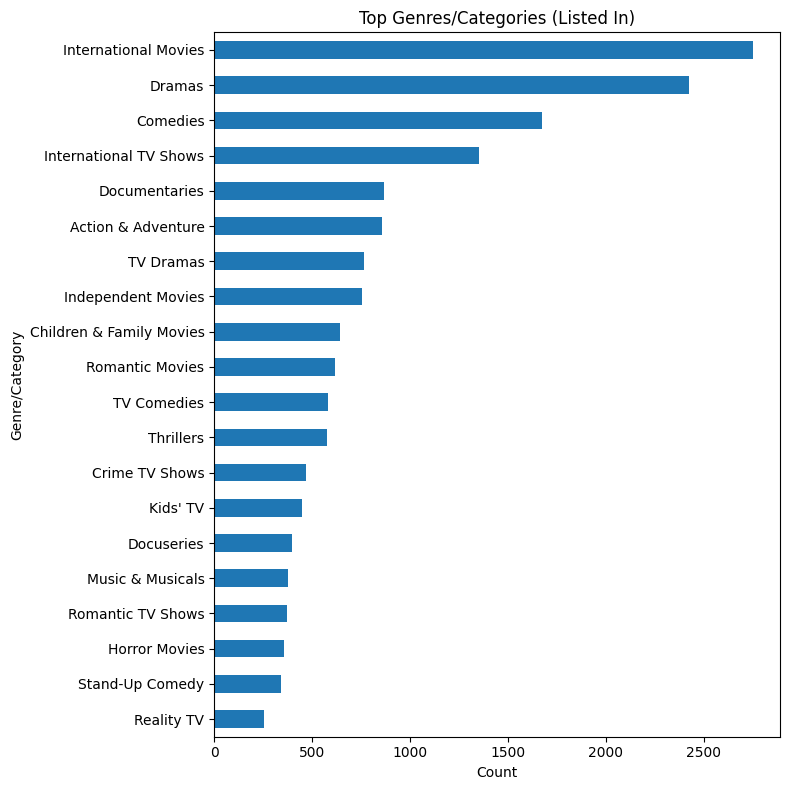

In [16]:
# 'listed_in' is a comma-separated set of genres/categories
from collections import Counter

def top_listed_in(series, top_n=20):
    c = Counter()
    for v in series.dropna():
        parts = [p.strip() for p in str(v).split(",")]
        c.update(parts)
    return pd.Series(dict(c.most_common(top_n)))

top_genres = top_listed_in(df['listed_in'], top_n=20).sort_values()
ax = top_genres.plot(kind='barh', figsize=(8,8))
ax.set_title("Top Genres/Categories (Listed In)")
ax.set_xlabel("Count")
ax.set_ylabel("Genre/Category")
plt.tight_layout()
plt.show()

## 8. People: Directors & Cast

In [17]:
def top_tokens(series, top_n=20):
    c = Counter()
    for v in series.dropna():
        parts = [p.strip() for p in str(v).split(",")]
        c.update(parts)
    return pd.Series(dict(c.most_common(top_n)))

from collections import Counter
top_directors = top_tokens(df['director'], 15)
top_cast      = top_tokens(df['cast'], 25)

display(pd.DataFrame(top_directors, columns=['count']).rename_axis('director'))
display(pd.DataFrame(top_cast, columns=['count']).rename_axis('person'))

,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12


,count
person,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Akshay Kumar,30
Om Puri,30
Yuki Kaji,29


## 9. Simple Correlations

In [18]:
numeric_cols = ['release_year', 'duration_min', 'seasons_count', 'added_year', 'added_month']
corr = df[numeric_cols].corr(numeric_only=True)
corr

,release_year,duration_min,seasons_count,added_year,added_month
release_year,1.000000,-0.206285,-0.090194,0.110473,-0.039316
duration_min,-0.206285,1.000000,NaN,0.124436,0.002738
seasons_count,-0.090194,NaN,1.000000,0.106543,0.004340
added_year,0.110473,0.124436,0.106543,1.000000,-0.160555
added_month,-0.039316,0.002738,0.004340,-0.160555,1.000000
